In [0]:
!wget "https://drive.google.com/file/d/1a-X7DA4osJOREJEicrXxjzGvsm3Z1Xcx/view?usp=sharing.zip"

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [0]:
!unzip training_images_final.zip

In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='dark',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


# New Section

In [0]:
X=[]
Z=[]
IMG_SIZE=200
BENCHPRESS_DIR="/content/drive/My Drive/Co Lab/training_images_final/bench_press"
BICEPCURL_DIR="/content/drive/My Drive/Co Lab/training_images_final/bicep_curl"
DEADLIFT_DIR="/content/drive/My Drive/Co Lab/training_images_final/deadlift"
SQUAT_DIR="/content/drive/My Drive/Co Lab/training_images_final/Squat"
Tread_Mills="/content/drive/My Drive/Co Lab/training_images_final/Tread_Mills"

In [0]:
def assign_label(img,pose_tipe):
    return pose_tipe

In [0]:
def make_train_data(pose_tipe,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,pose_tipe)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
pip install tqdm

In [0]:
make_train_data('BENCHPRESS',BENCHPRESS_DIR)
print(len(X))

100%|██████████| 545/545 [04:19<00:00,  2.80it/s]

545


In [0]:
make_train_data('BICEPCURL',BICEPCURL_DIR)
print(len(X))

100%|██████████| 628/628 [05:09<00:00,  1.52it/s]

1173


In [0]:
make_train_data('SQUAT',SQUAT_DIR)
print(len(X))

100%|██████████| 579/579 [04:04<00:00,  2.64it/s]

1752


In [0]:
make_train_data('Tread_Mills',Tread_Mills)
print(len(X))

100%|██████████| 530/530 [03:31<00:00,  3.15it/s]

2282


In [0]:
make_train_data('DEADLIFT',DEADLIFT_DIR)
print(len(X))

100%|██████████| 591/591 [04:41<00:00,  2.45it/s]

2873


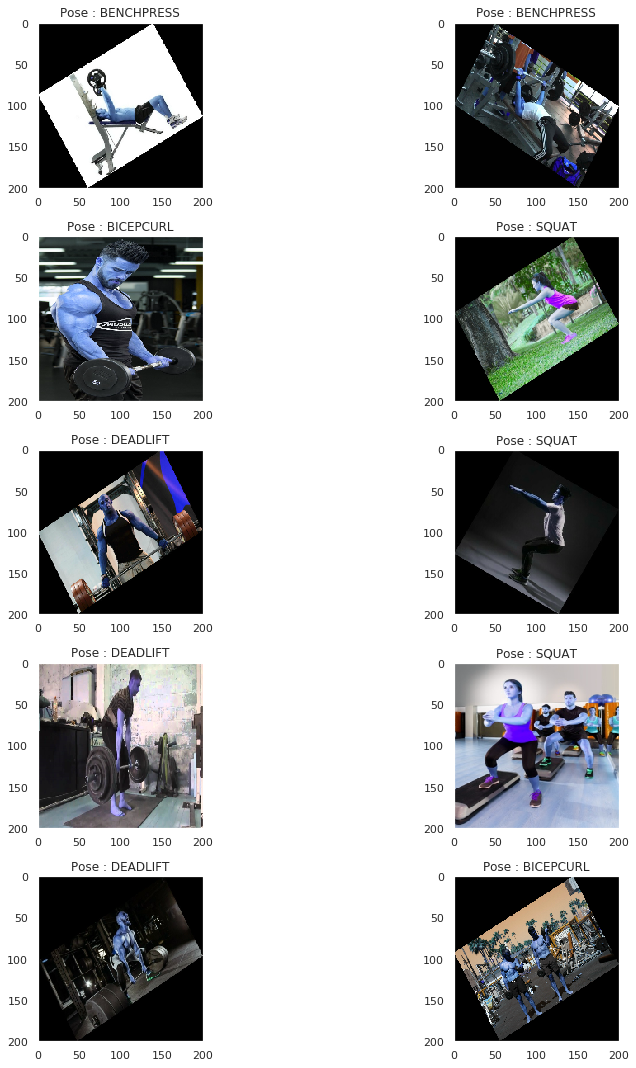

In [0]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Pose : '+Z[l])
        
plt.tight_layout()

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
print(len(x_train))

2154


In [0]:
print(len(x_test))

719


In [0]:
print(len(y_train))

2154


In [0]:
print(len(y_test))

719


In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [0]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [0]:
batch_size=128
epochs=60

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 96)       

In [0]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 80, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/80





16/16 [==============================] - 25s 2s/step - loss: 1.7245 - acc: 0.2160 - val_loss: 1.5823 - val_acc: 0.2225
Epoch 2/80
16/16 [==============================] - 20s 1s/step - loss: 1.5359 - acc: 0.2768 - val_loss: 1.4010 - val_acc: 0.3408
Epoch 3/80
16/16 [==============================] - 20s 1s/step - loss: 1.3965 - acc: 0.3625 - val_loss: 1.3025 - val_acc: 0.4771
Epoch 4/80
16/16 [==============================] - 20s 1s/step - loss: 1.3691 - acc: 0.4051 - val_loss: 1.2522 - val_acc: 0.4659
Epoch 5/80
16/16 [==============================] - 20s 1s/step - loss: 1.2948 - acc: 0.4568 - val_loss: 1.2316 - val_acc: 0.4618
Epoch 6/80
16/16 [==============================] - 20s 1s/step - loss: 1.2085 - acc: 0.5006 - val_loss: 1.0599 - val_acc: 0.5758
Epoch 7/80
16/16 [==============================] - 20s 1s/step - loss: 1.1677 - acc: 0.5269 - val_loss: 1.0672 - val_

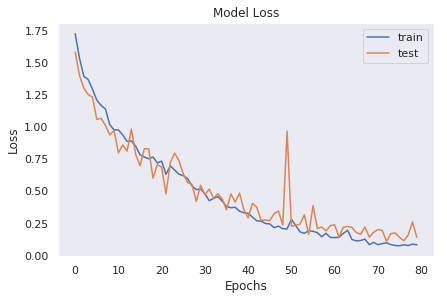

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

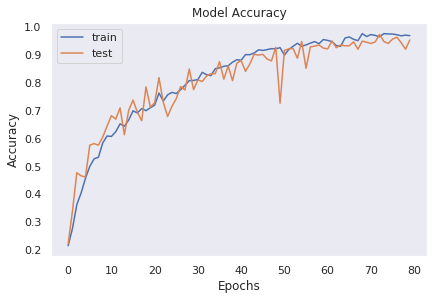

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [0]:
Y_pred = model.predict(x_test)
print(Y_pred)

[[5.67713698e-09 9.99999523e-01 1.14767855e-10 4.63110098e-07
  6.56585275e-09]
 [5.67467906e-10 1.47105288e-08 2.53636730e-11 1.97790090e-10
  1.00000000e+00]
 [1.22000904e-06 1.25211542e-02 2.14744702e-07 9.87448156e-01
  2.91725428e-05]
 ...
 [1.03539058e-07 2.02090053e-10 3.27273497e-09 1.01670095e-08
  9.99999881e-01]
 [4.24790895e-04 8.46820913e-05 9.99490499e-01 1.11585596e-09
  2.00832233e-11]
 [1.31920472e-01 3.81854991e-03 8.64259601e-01 1.49264133e-06
  1.78940496e-09]]


In [0]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[1 4 3 3 1 1 4 3 1 2 2 1 1 4 2 4 0 1 1 3 3 4 4 3 4 0 0 0 2 1 3 0 3 2 2 4 4
 0 4 2 1 4 3 3 4 3 1 0 2 2 3 3 2 2 0 3 1 2 0 0 0 2 3 2 3 1 4 2 1 2 4 2 3 2
 2 2 1 2 4 4 1 1 1 1 0 1 3 2 2 1 1 3 3 4 4 4 0 2 1 3 0 2 2 2 4 4 3 4 1 4 2
 1 1 0 0 2 3 0 0 1 0 3 2 2 3 4 2 3 3 2 4 2 1 4 3 2 4 0 2 1 2 0 1 3 1 4 2 3
 2 0 4 3 0 4 3 3 0 4 2 2 2 0 4 0 4 4 2 1 0 3 3 1 2 3 3 3 1 3 2 3 1 0 4 1 4
 0 2 2 3 0 2 2 1 0 1 4 1 1 0 1 0 4 4 0 3 1 3 1 0 3 0 2 0 2 2 2 0 2 2 0 4 3
 2 3 4 4 4 0 1 3 1 0 4 0 2 3 3 0 0 2 3 1 3 3 1 0 1 1 4 2 3 1 4 2 1 2 2 3 1
 4 2 1 4 3 1 4 3 2 3 3 1 3 3 3 0 2 2 1 4 2 4 0 3 1 3 1 3 2 1 4 2 2 2 3 4 2
 1 2 4 2 1 1 1 3 0 0 4 0 1 4 2 0 2 1 2 3 3 2 2 0 0 2 0 4 4 2 0 1 4 4 0 3 3
 3 3 1 2 0 3 3 2 0 2 4 0 3 2 2 4 0 0 4 0 2 0 4 2 3 2 4 3 3 2 0 4 4 2 2 0 0
 3 1 1 0 2 4 1 0 1 0 4 4 0 1 2 3 0 1 3 1 4 1 2 1 4 1 4 1 4 0 1 4 4 0 2 1 1
 4 0 1 3 0 0 3 1 0 3 0 1 2 3 0 3 1 1 3 3 0 0 2 1 0 0 2 1 2 0 4 0 1 0 2 4 2
 1 3 4 2 1 3 3 0 2 1 2 1 2 0 2 1 0 4 0 0 3 0 0 0 4 2 2 2 3 4 2 4 2 2 3 0 1
 4 1 1 2 1 4 2 0 4 2 3 0 

In [0]:
target_names = ['Bench press', 'Bicep curl', 'Deadlift','Squat',
                'Tread Mills']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

 Bench press       0.98      0.87      0.92       147
  Bicep curl       0.94      0.97      0.95       150
    Deadlift       0.88      0.99      0.93       143
       Squat       0.99      0.94      0.97       149
 Tread Mills       0.98      1.00      0.99       130

    accuracy                           0.95       719
   macro avg       0.96      0.95      0.95       719
weighted avg       0.96      0.95      0.95       719

[[128   6  12   0   1]
 [  2 145   2   1   0]
 [  0   1 142   0   0]
 [  0   3   5 140   1]
 [  0   0   0   0 130]]


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[128   6  12   0   1]
 [  2 145   2   1   0]
 [  0   1 142   0   0]
 [  0   3   5 140   1]
 [  0   0   0   0 130]]


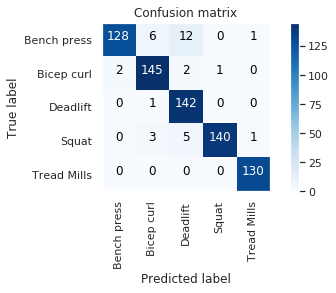

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()